# 1. 데이터 불러오기

In [1]:
import seaborn as sns
# import database
# import Create_table_sy
import csv
import sqlite3
import math
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import bw_class
import sy_class

In [2]:
train = pd.read_csv("./train.csv")
val = pd.read_csv("./val.csv")
test = pd.read_csv("./test.csv")

In [3]:
# 사용 예시
sy = bw_class.bw_preprocessing(train)
sy.apply_my_function()
sy_df = sy.return_dataframe()
sy_df

,IND,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,...,가입기간,쿠폰코드,할인율,GST,고객소비액,매출,처음거래날짜,마지막거래날짜,거래날차이,재방문여부
0,0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,...,12,ELEC10,10.0,0.10,158.6729,153.71,2019-01-01,2019-01-26,25 days,1
1,1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,...,12,ELEC10,10.0,0.10,158.6729,153.71,2019-01-01,2019-01-26,25 days,1
2,2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,...,12,OFF10,10.0,0.10,8.5295,2.05,2019-01-01,2019-01-26,25 days,1
3,3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,...,12,SALE10,0.0,0.18,109.9270,87.65,2019-01-01,2019-01-26,25 days,1
4,4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,...,12,AIO10,10.0,0.18,24.0230,16.50,2019-01-01,2019-01-26,25 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,44456,USER_0035,Transaction_20090,2019-10-31,Product_0989,Nest-USA,2,149.00,6.00,Not Used,...,26,ELEC10,0.0,0.10,333.8000,298.00,2019-03-06,2019-10-31,239 days,1
44457,44457,USER_0035,Transaction_20091,2019-10-31,Product_0981,Nest-USA,1,149.00,6.00,Used,...,26,ELEC10,10.0,0.10,153.5100,149.00,2019-03-06,2019-10-31,239 days,1
44458,44458,USER_0035,Transaction_20092,2019-10-31,Product_0990,Nest,1,199.00,19.99,Used,...,26,NE10,10.0,0.05,208.0450,199.00,2019-03-06,2019-10-31,239 days,1
44459,44459,USER_0035,Transaction_20093,2019-10-31,Product_0992,Nest,1,99.00,6.00,Clicked,...,26,NE10,0.0,0.05,109.9500,99.00,2019-03-06,2019-10-31,239 days,1


In [4]:
# 적용
processor = bw_class.RFMProcessor(train) 
rfm_without_outliers, rfm_outliers, rfm_without_outliers_log, X_scaled = processor.process_data()
processor.fit_clustering(X_scaled, n_clusters=4)
new_data_predictions = processor.predict(train)
new_data_predictions

,고객ID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Cluster
0,USER_0000,47,1,174.98174,3.850148,0.000000,5.164682,1.0
1,USER_0001,222,13,9572.18180,5.402677,2.564949,9.166616,-1.0
2,USER_0002,13,8,1501.92620,2.564949,2.079442,7.314504,3.0
3,USER_0004,47,13,1753.45086,3.850148,2.564949,7.469341,0.0
4,USER_0005,70,3,653.19048,4.248495,1.098612,6.481869,2.0
...,...,...,...,...,...,...,...,...
1289,USER_1463,210,3,816.40980,5.347108,1.098612,6.704916,2.0
1290,USER_1464,27,19,2647.24033,3.295837,2.944439,7.881273,3.0
1291,USER_1465,134,2,155.66092,4.897840,0.693147,5.047680,1.0
1292,USER_1466,9,1,301.02000,2.197225,0.000000,5.707177,1.0


In [5]:
cluster_data = bw_class.mapping_cluster(new_data_predictions)
cluster = cluster_data[['고객ID', '고객분류']]
sy = sy_df.merge(cluster, on = '고객ID', how = 'left')
sy

,IND,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,...,쿠폰코드,할인율,GST,고객소비액,매출,처음거래날짜,마지막거래날짜,거래날차이,재방문여부,고객분류
0,0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,...,ELEC10,10.0,0.10,158.6729,153.71,2019-01-01,2019-01-26,25 days,1,VIP고객
1,1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,...,ELEC10,10.0,0.10,158.6729,153.71,2019-01-01,2019-01-26,25 days,1,VIP고객
2,2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,...,OFF10,10.0,0.10,8.5295,2.05,2019-01-01,2019-01-26,25 days,1,VIP고객
3,3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,...,SALE10,0.0,0.18,109.9270,87.65,2019-01-01,2019-01-26,25 days,1,VIP고객
4,4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,...,AIO10,10.0,0.18,24.0230,16.50,2019-01-01,2019-01-26,25 days,1,VIP고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,44456,USER_0035,Transaction_20090,2019-10-31,Product_0989,Nest-USA,2,149.00,6.00,Not Used,...,ELEC10,0.0,0.10,333.8000,298.00,2019-03-06,2019-10-31,239 days,1,관심고객
44457,44457,USER_0035,Transaction_20091,2019-10-31,Product_0981,Nest-USA,1,149.00,6.00,Used,...,ELEC10,10.0,0.10,153.5100,149.00,2019-03-06,2019-10-31,239 days,1,관심고객
44458,44458,USER_0035,Transaction_20092,2019-10-31,Product_0990,Nest,1,199.00,19.99,Used,...,NE10,10.0,0.05,208.0450,199.00,2019-03-06,2019-10-31,239 days,1,관심고객
44459,44459,USER_0035,Transaction_20093,2019-10-31,Product_0992,Nest,1,99.00,6.00,Clicked,...,NE10,0.0,0.05,109.9500,99.00,2019-03-06,2019-10-31,239 days,1,관심고객


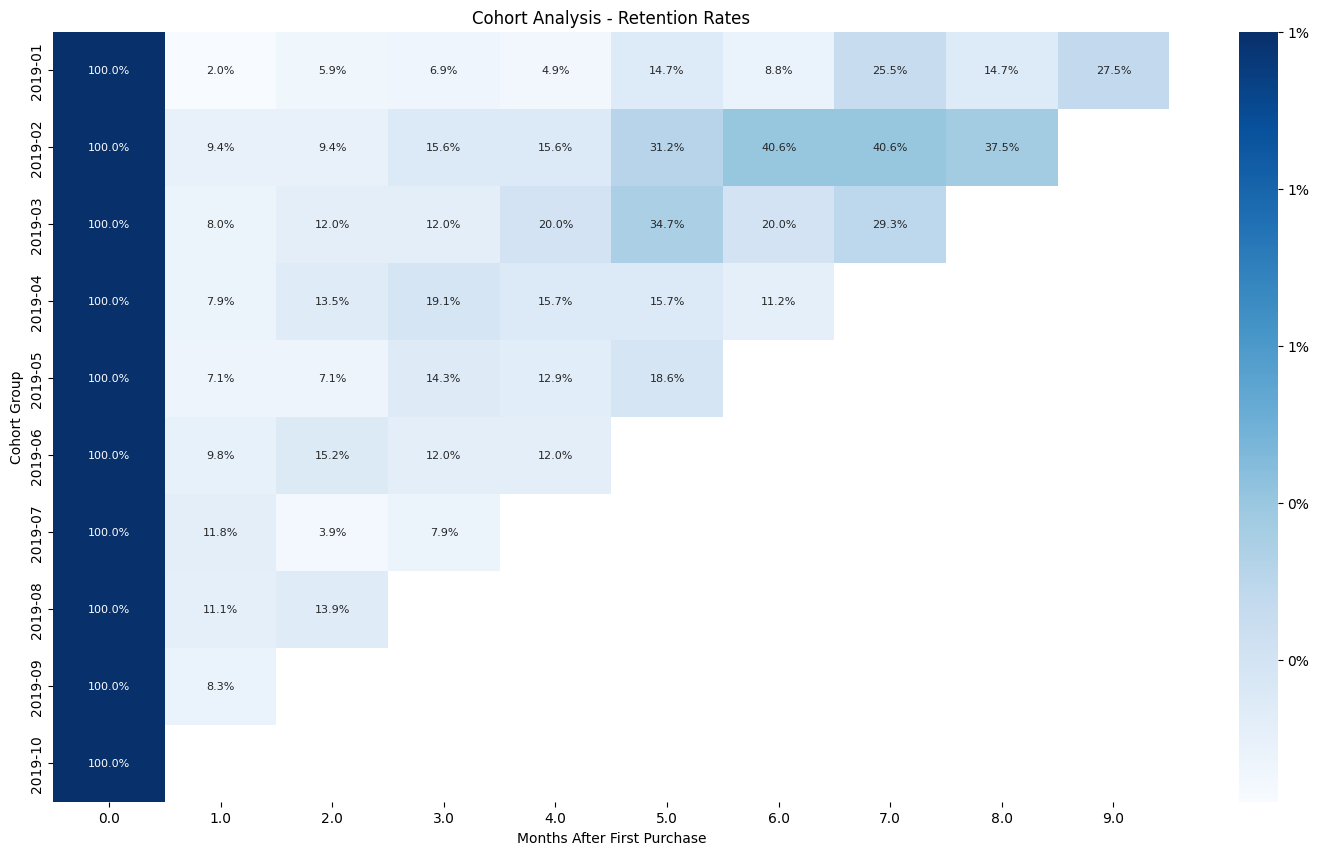

In [6]:
# 코호트 분석
cohort_analysis = sy_class.CohortAnalysis(sy, new_data_predictions)
cohort_analysis.calculate_purchase_metrics()
cohort = cohort_analysis.calculate_cohort()
retention_matrix = cohort_analysis.calculate_retention_rate(cohort)
cohort_analysis.visualize_retention_rate(retention_matrix)


In [7]:
# 카테고리별 재구매

In [8]:
customer_category_groups = sy.groupby(['고객ID', '제품카테고리'])
category_repurchase_periods = {}

# 고객별로 제품 카테고리 재구매 주기 계산
for name, group in customer_category_groups:
    
    # 시간순으로 정렬
    group = group.sort_values(by='거래날짜')

    # 각 거래 간의 시간 간격 계산
    purchase_gaps = group['거래날짜'].diff().dt.days
    
    # 첫 번째 구매 제외 (재구매 주기는 두 번째 구매부터 계산)
    purchase_gaps = purchase_gaps.iloc[1:]
    
    category = name[1]  #제품카테고리
    if category not in category_repurchase_periods:
        category_repurchase_periods[category] = []
    category_repurchase_periods[category].extend(purchase_gaps)

# 각 제품 카테고리별로 평균 재구매 주기 계산
average_repurchase_periods = {}
for category, periods in category_repurchase_periods.items():
    average_repurchase_periods[category] = pd.Series(periods).mean()

# 결과 출력
for category, avg_period in average_repurchase_periods.items():
    print(f"{category} 카테고리의 평균 재구매 주기: {avg_period:.3f} 일")

Apparel 카테고리의 평균 재구매 주기: 3.517 일
Office 카테고리의 평균 재구매 주기: 7.951 일
Bags 카테고리의 평균 재구매 주기: 16.478 일
Drinkware 카테고리의 평균 재구매 주기: 11.366 일
Google 카테고리의 평균 재구매 주기: 25.188 일
Headgear 카테고리의 평균 재구매 주기: 25.555 일
Nest-USA 카테고리의 평균 재구매 주기: 4.759 일
Lifestyle 카테고리의 평균 재구매 주기: 10.874 일
Nest 카테고리의 평균 재구매 주기: 1.412 일
Bottles 카테고리의 평균 재구매 주기: 34.908 일
Nest-Canada 카테고리의 평균 재구매 주기: 19.711 일
Notebooks & Journals 카테고리의 평균 재구매 주기: 16.230 일
Backpacks 카테고리의 평균 재구매 주기: 12.357 일
Gift Cards 카테고리의 평균 재구매 주기: 0.838 일
Waze 카테고리의 평균 재구매 주기: 13.449 일
Fun 카테고리의 평균 재구매 주기: 29.405 일
Accessories 카테고리의 평균 재구매 주기: 13.542 일
Housewares 카테고리의 평균 재구매 주기: 41.533 일
Android 카테고리의 평균 재구매 주기: 40.000 일
More Bags 카테고리의 평균 재구매 주기: 0.000 일


In [9]:
result_df = pd.DataFrame(list(average_repurchase_periods.items()), columns=['제품카테고리', '평균 재구매 주기(일)'])
result_df

,제품카테고리,평균 재구매 주기(일)
0,Apparel,3.517378
1,Office,7.950936
2,Bags,16.477539
3,Drinkware,11.365633
4,Google,25.187500
5,Headgear,25.554839
6,Nest-USA,4.758780
7,Lifestyle,10.873895
8,Nest,1.411559
9,Bottles,34.907692


In [10]:
# 첫 번째 그룹바이 및 카운트
klk = sy.groupby(['고객ID', '거래날짜', '제품카테고리']).size().reset_index(name='n')

# 고객ID와 제품카테고리로 그룹바이하여 재구매 횟수 계산
klk = klk.groupby(['고객ID', '제품카테고리']).size().reset_index(name='n2')

# n2가 1이 아닌 행 필터링
klk = klk[klk['n2'] != 1]

# n2를 1씩 감소
klk['n2'] = klk['n2'] - 1

In [11]:
# 제품카테고리별로 그룹바이하여 재구매율 계산
ka = klk.groupby('제품카테고리').agg(
    n=('고객ID', 'size'),
    sum=('n2', 'sum')
).reset_index()

ka['재구매율'] = ka['n'] / ka['sum']

# 결과 출력
ka

,제품카테고리,n,sum,재구매율
0,Accessories,4,4,1.000000
1,Android,1,1,1.000000
2,Apparel,501,978,0.512270
3,Backpacks,4,5,0.800000
4,Bags,151,267,0.565543
5,Bottles,24,32,0.750000
6,Drinkware,246,436,0.564220
7,Fun,13,19,0.684211
8,Gift Cards,1,1,1.000000
9,Google,5,8,0.625000


In [12]:
import plotly.express as px
fig = px.bar(ka, 
                 x='재구매율',
                 y='제품카테고리',  
                 title='재구매율',
                 color='제품카테고리',  # 카테고리에 따라 색상 지정
                 orientation='h',
                 text='재구매율')  # 막대에 텍스트 라벨 추가
fig

In [13]:
#실행 예시
CategoryAnalysis = sy_class.CustomerCategoryAnalysis(sy)
CategoryAnalysis.calculate_repurchase_periods()
CategoryAnalysis.visualize_repurchase_periods()


# 2. EDA

In [14]:
customer = database_sy.making_dataframe('Customer_info')
print(len(customer)); customer.head(2) 

NameError: name 'database_sy' is not defined

In [ ]:
discount = database_sy.making_dataframe('Discount_info')
print(len(discount)); discount.head(2) 

In [ ]:
marketing = database_sy.making_dataframe('Marketing_info')
print(len(marketing)); marketing.head(2) 

In [ ]:
onlinesales = database_sy.making_dataframe('Onlinesales_info')
print(len(onlinesales)); onlinesales.head(2) 

In [ ]:
tax = database_sy.making_dataframe('Tax_info')
print(len(tax)); tax.head(2)

In [ ]:
customer[customer["가입기간"] <= 12]

##### total : customer df와 onlinesales df 병합

In [ ]:
# customers_data 통합 
onlinesales["거래날짜"] = pd.to_datetime(onlinesales["거래날짜"])
total = pd.merge(onlinesales, customer, how='left', left_on='고객ID', right_on='고객ID')

df = total.copy()
df["거래날짜"] = pd.to_datetime(df["거래날짜"])

# discount_coupon통합
df["월"]=df["거래날짜"].dt.month
month_dict = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
discount["월"] = discount["월"].map(month_dict)
df=df.merge(discount, on=["월","제품카테고리"],how="left")

# tax_amount 통합
df = df.merge(tax, on="제품카테고리",how="outer")

# 쿠폰상태가 used 아닌 경우에 할인율 0 적용
df.loc[df['쿠폰상태'] != 'Used', '할인율'] = 0

# null값 대체
df=df.fillna(0)

# 총 고객소비액 = 수량 * 평균금액 * (1-할인율)/100 * (1+GST) + 배송료
df["고객소비액"]=df["수량"]*df["평균금액"]*(1-df["할인율"]/100)*(1+df["GST"])+df["배송료"]
df["매출"]=df["수량"]*df["평균금액"]
total = df
total

In [ ]:
total.describe()

In [ ]:
total.info()

##### numeric/categorical 변수 구분

In [ ]:
num_columns = total.select_dtypes(include=np.number).columns.tolist()
cat_columns = total.select_dtypes(exclude=np.number).columns.tolist()

In [ ]:
total[num_columns]

In [ ]:
# import matplotlib.pyplot as plt
# plt.rcParams['font.family'] ='Malgun Gothic'
# total.hist(bins=50, figsize=(20,15))

In [ ]:
# print(total[num_columns].groupby('가입기간').mean())

#  3. 분석

#### 3.1 고객의 최초 구매 날짜 정의 후 카테고리별 재구매 여부 예측 분석

##### 최초구매 & 최근구매 날짜 정의 / 재구매여부  / 구매횟수 변수 생성

In [ ]:
purchase = total.copy()
# 최초구매와 최근구매날짜 정의 
result = purchase.groupby('고객ID').agg(최초구매날짜=('거래날짜', 'min'),
                                      최근구매날짜=('거래날짜', 'max')).reset_index()

# 최초 구매날로부터 구매날짜 계산
result['전체기간'] = result['최근구매날짜'] - result['최초구매날짜']

# 재구매여부 계산
result['재구매여부'] = result['전체기간'].apply(lambda x: 0 if x == pd.Timedelta(days=0) else 1)

# 거래횟수 계산
p_count = purchase.groupby('고객ID').agg(구매횟수=('거래날짜', 'count')).reset_index()
c = pd.merge(result, p_count, how='left', left_on='고객ID', right_on='고객ID')

# 고객table과 병합
k = pd.merge(customer, c, how='left', left_on='고객ID', right_on='고객ID')
k

##### 고객분류 컬럼 추가

In [ ]:
data = total.copy()

import datetime

#Recency의 기준은 2020-01-01 00:00시
refrence_date = data.거래날짜.max() + datetime.timedelta(days = 1) 
print('Reference Date:', refrence_date)
data['Recency'] = (refrence_date - data.거래날짜).dt.days 

# 기준 날짜로부터 고객의 최종 접속일이 며칠이 떨어져있는지를 계산

#Recency 계산(최근에 구매한 
rfm = data[['고객ID', 'Recency']].groupby("고객ID").min().reset_index()

#Frequency 계산
freq = data[['고객ID', '거래ID']].drop_duplicates().groupby('고객ID').count().reset_index()
freq.columns=['고객ID','Frequency']
rfm=pd.merge(rfm,freq,how='left')

#Monetary 계산
Monetary = data[['고객ID', '고객소비액']].groupby("고객ID").sum().reset_index()
rfm = rfm.merge(Monetary).rename(columns= {"고객소비액":"Monetary"})
rfm

In [ ]:
def separate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
    
    df_outliers = df.loc[~filter]  # 이상치만을 담은 DataFrame
    df = df.loc[filter]  # 이상치를 제거한 DataFrame
    
    return df, df_outliers

In [ ]:
# 'Frequency' 컬럼의 이상치 제거
rfm_without_outliers_f, rfm_outliers_f = separate_outliers(rfm, 'Frequency')
# 'Monetary' 컬럼의 이상치 제거
rfm_without_outliers_m, rfm_outliers_m = separate_outliers(rfm, 'Monetary')
# 이상치가 없는 행만 선택
rfm_without_outliers = rfm.loc[rfm.index.isin(rfm_without_outliers_f.index) & rfm.index.isin(rfm_without_outliers_m.index)]
# 이상치를 포함하는 행만 선택
rfm_outliers = rfm.loc[rfm.index.isin(rfm_outliers_f.index) | rfm.index.isin(rfm_outliers_m.index)]
rfm_without_outliers

In [ ]:
# R, F, M 컬럼 각각 log변환
rfm_without_outliers['Recency_log'] = rfm_without_outliers['Recency'].apply(math.log)
rfm_without_outliers['Frequency_log'] = rfm_without_outliers['Frequency'].apply(math.log)
rfm_without_outliers['Monetary_log'] = rfm_without_outliers['Monetary'].apply(math.log)
features = ['Monetary_log', 'Recency_log','Frequency_log']
rfm_without_outliers_log=rfm_without_outliers[features]
rfm_without_outliers_log

In [ ]:
rfm_without_outliers['Monetary'].plot()

In [ ]:
rfm_without_outliers['Monetary_log'].plot()

In [ ]:
def find_optimal_k(df, max_k):
    wcss = []

    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, max_k+1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

# RFM 데이터 사용
rfm_data = rfm_without_outliers_log

# 최대 클러스터 개수를 10으로 설정
find_optimal_k(rfm_data,10)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def visualize_kmeans(cluster_list, feature_columns, X):
    cluster_centers = dict()
    for n_clusters in cluster_list:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_size_inches(20, 6)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=123)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X=X, labels=cluster_labels)
        cluster_centers.update({n_clusters: {'cluster_center': clusterer.cluster_centers_,
                                             'silhouette_score': silhouette_avg,
                                             'labels': cluster_labels}
                               })

        sample_silhouette_values = silhouette_samples(X=X, labels=cluster_labels)
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.Spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  

        ax1.set_title("The silhouette plot for the various clusters")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
        colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)

        centers = clusterer.cluster_centers_
        y = 0
        x = 1
        ax2.scatter(X.iloc[:, x], X.iloc[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
        ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
        for i, c in enumerate(centers):
            ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
        ax2.set_title("{} Clustered data".format(n_clusters))
        ax2.set_xlabel(feature_columns[x])
        ax2.set_ylabel(feature_columns[y])

        x = 2
        ax3.scatter(X.iloc[:, x], X.iloc[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
        ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
        for i, c in enumerate(centers):
            ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
        ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
        ax3.set_xlabel(feature_columns[x])
        ax3.set_ylabel(feature_columns[y])

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        plt.show()
    return cluster_centers

# 함수 호출 예제
# cluster_centers = visualize_kmeans([3, 4, 5], features, rfm_without_outliers_log)


In [ ]:
# K = 3, 4, 5 시각화
cluster_centers=visualize_kmeans([3,4,5],features,rfm_without_outliers_log)

In [ ]:
rfm_without_outliers.clusters_4

In [ ]:
rfm_without_outliers['clusters_3'] = cluster_centers[3]['labels'] 
rfm_without_outliers['clusters_4'] = cluster_centers[4]['labels']

fig = plt.figure(figsize=(20,7))
f1 = fig.add_subplot(131)
market = rfm_without_outliers.clusters_3.value_counts()
plt.pie(market, labels=market.index, autopct='%.1f%%', shadow=True, startangle=90)
plt.title('3 Clusters')

f1 = fig.add_subplot(132)
market = rfm_without_outliers.clusters_4.value_counts()
plt.pie(market, labels=market.index, autopct='%.1f%%', shadow=True, startangle=90)
plt.title('4 Clusters')

In [ ]:
rfm_clusters=rfm_without_outliers[["고객ID","Recency","Frequency","Monetary","clusters_4"]]
rfm_clusters=rfm_clusters.rename(columns={"clusters_4":"clusters"})
rfm_outliers["clusters"]=4
rfm_clusters = pd.concat([rfm_clusters, rfm_outliers]).reset_index(drop=True)

rfm_clusters

In [ ]:
dt = k.merge(rfm_clusters, on='고객ID', how="left")

# 클러스터 이름 변경
cluster_names = {0: '고객유형0', 1: '고객유형1', 2: '고객유형2', 3: '고객유형3', 4:"이상치고객"}
dt['clusters'] = dt['clusters'].replace(cluster_names)

# 고객분류 딕셔너리 생성
customer_classification = {'고객유형0': '관심고객', '고객유형1': '잠재고객', '고객유형2': '충성고객', '고객유형3': '이탈고객', "이상치고객" : "VIP"}

# 고객분류 컬럼 생성
dt['고객분류'] = dt['clusters'].replace(customer_classification)
dt.drop(columns = ['clusters'], inplace = True)

customer = dt
sorted_customer = customer.sort_values(by='고객ID', ascending=True)
sorted_customer


##### 평균구매주기 변수 생성

In [ ]:
from datetime import datetime

In [ ]:
customer

In [ ]:
customer['최근구매날짜'] = customer['최근구매날짜'].astype('str').apply(lambda _ : datetime.strptime(_,'%Y-%m-%d'))
customer['최초구매날짜'] = customer['최초구매날짜'].astype('str').apply(lambda _ : datetime.strptime(_,'%Y-%m-%d'))

In [ ]:
# 구매주기 
customer['전체기간'] = customer['최근구매날짜'] - customer['최초구매날짜']
customer['전체기간'] = customer['전체기간'].dt.days
customer

In [ ]:
customer['구매주기'] = np.where(
    customer['전체기간'] == 0,
    0,
    (customer['전체기간'] / (customer['구매횟수'] - 1)).astype(str)
)

customer['구매주기'] = np.where(
    customer['구매횟수'] == 1,
    0,
    customer['구매주기']
)

In [ ]:
customer

In [ ]:
customer['구매주기'] = customer['구매주기'].astype(float)

In [ ]:
customer

### DB에 저장

In [ ]:
database_sy.create_new_table(total, 'total')

In [ ]:
database_sy.create_new_table(customer, 'customer')

# 코호트분석

In [ ]:
total = pd.merge(total, customer[['고객ID', '최초구매날짜']], on='고객ID')

In [ ]:
# 최초구매한 월 변수 생성
total['최초구매_월'] = total['최초구매날짜'].dt.to_period('M').astype('str').apply(lambda _ : datetime.strptime(_,'%Y-%m'))

In [ ]:
# 거래한 월 변수 생
total['구매_월'] = total['거래날짜'].dt.to_period('M').astype('str').apply(lambda _ : datetime.strptime(_,'%Y-%m'))

In [ ]:
total.info()

In [ ]:
# 최초 구매한 달 별 고객수
cohort = total.groupby(['최초구매_월', '구매_월']).agg(n_customers=('고객ID', 'nunique')).reset_index()

In [ ]:
# 첫구매 이후 
cohort['코호트_기간'] = round((cohort['구매_월'] - cohort['최초구매_월']).apply(lambda x: x / pd.Timedelta(days=30)))

In [ ]:
# 코호트 그룹별(최초구매_월) 첫 구매 고객 수를 계산
cohort_size = cohort[cohort['코호트_기간'] == 0][['최초구매_월', 'n_customers']].rename(columns={'n_customers': '코호트_크기'})

cohort = pd.merge(cohort, cohort_size, on='최초구매_월')
cohort

###  DB에 저장

In [ ]:
database_sy.create_new_table(cohort, 'cohort')

In [ ]:
cohort.info()

In [ ]:
cohort.info()

In [ ]:
# 재구매율 계산 = (해당 기간에 구매 고객수)/(첫구매 고객수)
cohort['재구매율'] = cohort['n_customers']/cohort['코호트_크기']

In [ ]:
# "코호트 기간"과 "최초구매_월"을 인덱스로 하여 재구매율 피벗 테이블 생성
cohort['최초구매_월'] = cohort['최초구매_월'].dt.to_period('M')
retention_matrix = cohort.pivot_table(index='최초구매_월', columns='코호트_기간', values='재구매율')

# 재구매율 시각화
plt.figure(figsize=(18, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Analysis - Retention Rates')
plt.ylabel('Cohort Group')
plt.xlabel('Months After First Purchase')
plt.show()

# 카테고리별 재구매 주기, 재구매율

In [ ]:
online_sales = database_sy.making_dataframe('total')
online_sales

In [ ]:
customer = database_sy.making_dataframe('customer')
customer

In [ ]:
online_sales['거래날짜'] = pd.to_datetime(online_sales['거래날짜'])
customer_category_groups = online_sales.groupby(['고객ID', '제품카테고리'])


category_repurchase_periods = {}

# 고객별로 제품 카테고리 재구매 주기 계산
for name, group in customer_category_groups:
    
    # 시간순으로 정렬
    group = group.sort_values(by='거래날짜')

    # 각 거래 간의 시간 간격 계산
    purchase_gaps = group['거래날짜'].diff().dt.days
    
    # 첫 번째 구매 제외 (재구매 주기는 두 번째 구매부터 계산)
    purchase_gaps = purchase_gaps.iloc[1:]
    
    category = name[1]  #제품카테고리
    if category not in category_repurchase_periods:
        category_repurchase_periods[category] = []
    category_repurchase_periods[category].extend(purchase_gaps)

# 각 제품 카테고리별로 평균 재구매 주기 계산
average_repurchase_periods = {}
for category, periods in category_repurchase_periods.items():
    average_repurchase_periods[category] = pd.Series(periods).mean()

# 결과 출력
for category, avg_period in average_repurchase_periods.items():
    print(f"{category} 카테고리의 평균 재구매 주기: {avg_period:.3f} 일")


In [ ]:
result_df = pd.DataFrame(list(average_repurchase_periods.items()), columns=['제품카테고리', '평균 재구매 주기(일)'])
result_df

In [ ]:
# 거래날짜를 datetime 타입으로 변환
online_sales['거래날짜'] = pd.to_datetime(online_sales['거래날짜'])

# 첫 번째 그룹바이 및 카운트
klk = online_sales.groupby(['고객ID', '거래날짜', '제품카테고리']).size().reset_index(name='n')
klk

In [ ]:
# 고객ID와 제품카테고리로 그룹바이하여 재구매 횟수 계산
klk = klk.groupby(['고객ID', '제품카테고리']).size().reset_index(name='n2')
klk

In [ ]:
# n2가 1이 아닌 행 필터링
klk = klk[klk['n2'] != 1]

# n2를 1씩 감소
klk['n2'] = klk['n2'] - 1

In [ ]:
# 제품카테고리별로 그룹바이하여 재구매율 계산
ka = klk.groupby('제품카테고리').agg(
    n=('고객ID', 'size'),
    sum=('n2', 'sum')
).reset_index()

ka['재구매율'] = ka['n'] / ka['sum']

# 결과 출력
ka

In [ ]:
s = sns.countplot(data = total, x = '제품카테고리', order = total['제품카테고리'].value_counts().index)
plt.xticks(rotation=40)

In [ ]:
total['재구매여부'] = np.where(
    total['거래날짜'] - total['최초구매날짜'] == '0 days',
    0,
    1
)

In [ ]:
category = total[total['재구매여부'] == 1].groupby(['고객ID', '제품카테고리']).count()
category = total.groupby(['제품카테고리']).agg(n_customers=('고객ID', 'nunique')).reset_index()

In [ ]:
category = pd.merge(ka, result_df, on = '제품카테고리')
category

In [ ]:
database_sy.create_new_table(category, 'category')

# 재구매 여부 예측 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
sales = database_sy.making_dataframe('total')

In [ ]:
customer  = database_sy.making_dataframe('customer')

In [ ]:
# 병합 전에 중복 열 제거
sales = sales.drop(columns=['성별', '고객지역', '가입기간'])

# 데이터 프레임 병합
merged_df = pd.merge(sales, customer, on='고객ID', how='inner')

In [ ]:
merged_df['거래날짜'] = pd.to_datetime(sales['거래날짜'])
merged_df['최초구매날짜'] = pd.to_datetime(customer['최초구매날짜'])
merged_df['최근구매날짜'] = pd.to_datetime(customer['최근구매날짜'])

In [ ]:
# 1월 ~ 9월 데이터를 가지고 모델링
october_filter = merged_df['거래날짜'].dt.month < 10
dat = merged_df[october_filter]

In [ ]:
# 분석에 필요 없는 변수 제거
# 고객ID, 거래ID, 거래날짜, 제품ID, 쿠폰코드, 최초구매날짜, 최근구매날짜
columns_to_drop = ['고객ID', '거래ID', '거래날짜', '제품ID', '월', '쿠폰코드', 'GST', '최초구매날짜', '최근구매날짜']

dat = dat.drop(columns=columns_to_drop)
dat.columns

In [ ]:
dat.columns

In [ ]:
# dat테이블  db에 저장
database_sy.create_new_table(dat, 'dat')

In [ ]:
y = dat['재구매여부']
X = dat.loc[:, [i for i in list(dat.columns) if i not in ['재구매여부']]]

In [ ]:
# X df의 이상치 탐색

In [ ]:
# 일단은 이상치 제거 안하고 모델링

In [ ]:
def separate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
    
    df_outliers = df.loc[~filter]  # 이상치만을 담은 DataFrame
    df = df.loc[filter]  # 이상치를 제거한 DataFrame
    
    return df, df_outliers

In [ ]:
# 'Frequency' 컬럼의 이상치 제거
rfm_without_outliers_f, rfm_outliers_f = separate_outliers(rfm, 'Frequency')
# 'Monetary' 컬럼의 이상치 제거
rfm_without_outliers_m, rfm_outliers_m = separate_outliers(rfm, 'Monetary')
# 이상치가 없는 행만 선택
rfm_without_outliers = rfm.loc[rfm.index.isin(rfm_without_outliers_f.index) & rfm.index.isin(rfm_without_outliers_m.index)]
# 이상치를 포함하는 행만 선택
rfm_outliers = rfm.loc[rfm.index.isin(rfm_outliers_f.index) | rfm.index.isin(rfm_outliers_m.index)]
rfm_without_outliers

In [ ]:
# 

In [ ]:
# 상관분석

In [ ]:
plt.figure(figsize = (15,15))
plt.rcParams['font.family'] ='Malgun Gothic'
sns.heatmap(X[num_columns].corr(), cmap = 'coolwarm', vmax =1, vmin = -1, annot = True)


In [ ]:
# 변수 변환 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

In [ ]:
num_columns

In [ ]:
cat_columns

In [ ]:
# 변수 스케일링 & 원핫인코딩

In [ ]:
trans = ColumnTransformer([
    ('cat_columns',OneHotEncoder(sparse_output=False),cat_columns),
    ('num_columns',StandardScaler(),num_columns)])

In [ ]:
trans.fit(X)

In [ ]:
from sklearn.pipeline import Pipeline
import pickle as pkl

In [ ]:
# 전처리 파이프라인 정의
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 파이프라인 실행
df_preprocessed = preprocessor.fit_transform(X)

# 결과를 데이터프레임으로 변환 (열 이름 포함)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
df_preprocessed = preprocessor.fit_transform(X)

# Get feature names
num_features = numeric_features
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_features = list(num_features) + list(cat_features)

# Create a DataFrame with the transformed data
df_preprocessed = pd.DataFrame(df_preprocessed, columns=all_features)

# 결과 출력
print(df_preprocessed)

In [ ]:
# 1~월 9월 데이터에서 7:3비율로 train/test set 분할
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, y, test_size = 0.3)

In [ ]:
# 검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3)

In [ ]:
print(len(df_preprocessed),len(X_train),len(X_val),len(X_test))

In [ ]:
# 분류 모델

In [ ]:
model = RandomForestClassifier(n_estimators = 50, max_features = 'sqrt', criterion = 'gini', max_depth = 10 )
model.fit(X_train, y_train)

In [ ]:
print("creating model files...")
pkl.dump(model,open("model.pkl","wb"))
print("creating transformation fole...")
pkl.dump(trans, open("transform.pkl","wb"))

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv = 5)

In [ ]:
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

In [ ]:
# 예측
pred = model.predict(X_test)

In [ ]:
y_test

In [ ]:
pred

In [ ]:
pd.crosstab(y_test, pred)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 200],
    'max_depth' : [6, 10], 
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 16]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=5, verbose=2 )
grid_cv.fit(X_train , y_train) # grid.cv.fit(train_x, train_y)

estimator =grid_cv.best_estimator_ 
pred = estimator.predict(X_val) # estimator.predict(test)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
ftr_importances_values = estimator.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
logistic = LogisticRegression()
model2 = logistic.fit(X_train, y_train)

In [ ]:
pred = model2.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))